In [83]:
# Common
from IPython.display import display
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


from sklearn.decomposition import PCA

#classifiers
from sklearn.tree import DecisionTreeClassifier

np.random.seed(10)
CORES=4

In [214]:
def load_and_describe(csv_name, should_display=False):
    _df = pd.read_csv(csv_name)
    
    if should_display:
        display(_df.head())
        display(_df.describe())
    
    return _df


def split_input_in_sample_and_label_by_label_column(dataset, label_column_name, should_display=False):
    """
    Splits dataset DataFrame into samples|labels DataFrames using label_column_name.
    
    labels is converted to numbers if it contains strings
    """
    
    _df_labels = pd.DataFrame(dataset[label_column_name])
    _df_samples = dataset.drop(label_column_name, axis = 1)
    
    if type(_df_labels[label_column_name][0]) is str:
        label_values = _df_labels[label_column_name].unique()
        label_values = {_label:_i for _i, _label in enumerate(label_values)}
        counter = 0
        def bla(x):
            print("veo {}".format(x))
            #print(x)
            #print(str(x))
            return label_values[str(x)]
        _df_labels.apply(bla)
        print(_df_labels)
    
    if should_display:
        display(_df_labels.head())
        display(_df_labels.describe())
        display(_df_samples.head())
        display(_df_samples.describe())
    
    return _df_samples, _df_labels


In [215]:
abbreviations = load_and_describe("siglas-dev.csv", should_display=False)

In [217]:
abbreviation_X, abbreviation_Y = split_input_in_sample_and_label_by_label_column(abbreviations, 'clase');

#abbreviation_X_train, abbreviation_X_test, abbreviation_Y_train, abbreviation_Y_test = sklearn.model_selection.train_test_split(abbreviation_X, abbreviation_Y, test_size=1/10, stratify=siglas_Y)

veo 0      acronimo
1      acronimo
2      acronimo
3      acronimo
4      acronimo
5      acronimo
6      acronimo
7      acronimo
8      acronimo
9      acronimo
10     acronimo
11     acronimo
12     acronimo
13     acronimo
14     acronimo
15     acronimo
16     acronimo
17     acronimo
18     acronimo
19     acronimo
20     acronimo
21     acronimo
22     acronimo
23     acronimo
24     acronimo
25     acronimo
26     acronimo
27     acronimo
28     acronimo
29     acronimo
         ...   
373    deletreo
374    deletreo
375    deletreo
376    deletreo
377    deletreo
378    deletreo
379    deletreo
380    deletreo
381    deletreo
382    deletreo
383    deletreo
384    deletreo
385    deletreo
386    deletreo
387    deletreo
388    deletreo
389    deletreo
390    deletreo
391    deletreo
392    deletreo
393    deletreo
394    deletreo
395    deletreo
396    deletreo
397    deletreo
398    deletreo
399    deletreo
400    deletreo
401    deletreo
402    deletreo
Name: clase, Length:

KeyError: ('0      acronimo\n1      acronimo\n2      acronimo\n3      acronimo\n4      acronimo\n5      acronimo\n6      acronimo\n7      acronimo\n8      acronimo\n9      acronimo\n10     acronimo\n11     acronimo\n12     acronimo\n13     acronimo\n14     acronimo\n15     acronimo\n16     acronimo\n17     acronimo\n18     acronimo\n19     acronimo\n20     acronimo\n21     acronimo\n22     acronimo\n23     acronimo\n24     acronimo\n25     acronimo\n26     acronimo\n27     acronimo\n28     acronimo\n29     acronimo\n         ...   \n373    deletreo\n374    deletreo\n375    deletreo\n376    deletreo\n377    deletreo\n378    deletreo\n379    deletreo\n380    deletreo\n381    deletreo\n382    deletreo\n383    deletreo\n384    deletreo\n385    deletreo\n386    deletreo\n387    deletreo\n388    deletreo\n389    deletreo\n390    deletreo\n391    deletreo\n392    deletreo\n393    deletreo\n394    deletreo\n395    deletreo\n396    deletreo\n397    deletreo\n398    deletreo\n399    deletreo\n400    deletreo\n401    deletreo\n402    deletreo\nName: clase, Length: 403, dtype: object', 'occurred at index clase')

In [73]:
gender = load_and_describe('genero.csv')

In [75]:
gender_X, gender_Y = split_input_in_sample_and_label_by_label_column(gender, 'gender', False)

gender_X_train, gender_X_test, gender_Y_train, gender_Y_test = sklearn.model_selection.train_test_split(gender_X, gender_Y, test_size=1/10, stratify=gender_Y)

### Ejercicio
Experimentar con diferentes algoritmos de clasificación (árboles, Naive Bayes, SVM, KNN) para los ejemplos A
y B, usando 10-fold CV. ¿Qué algoritmos funcionan mejor para los datos originales?

In [96]:
#Using default hiperparameters
def default_tree_performance_on_data(dataset_train, labels_train, amount_folds=10):
    _tree = sklearn.tree.DecisionTreeClassifier()
    _tree.fit(dataset_train, labels_train)
    print(_tree.score(dataset_train, labels_train))
    return sklearn.model_selection.cross_validate(_tree, dataset_train, labels_train, scoring=('roc_auc'), cv=amount_folds, n_jobs=CORES)
    
default_tree_performance_on_data(abbreviation_X_train, abbreviation_Y_train)

0.9972375690607734


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
c:\python36\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...on36\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
c:\python36\lib\runpy.py in _run_code(code=<code object <module> at 0x0000016040F940C0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'c:\python36\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'c:\python36\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...on36\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'c:\\python36\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...on36\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000016040F940C0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'c:\python36\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'c:\python36\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...on36\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'c:\\python36\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
c:\python36\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
c:\python36\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
c:\python36\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    492         if self.poller is not None:
    493             self.poller.start()
    494         self.kernel.start()
    495         self.io_loop = ioloop.IOLoop.current()
    496         try:
--> 497             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    498         except KeyboardInterrupt:
    499             pass
    500 
    501 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
c:\python36\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
c:\python36\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    416             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    417                                    finalizer=self._asyncgen_finalizer_hook)
    418         try:
    419             events._set_running_loop(self)
    420             while True:
--> 421                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    422                 if self._stopping:
    423                     break
    424         finally:
    425             self._stopping = False

...........................................................................
c:\python36\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1426                         logger.warning('Executing %s took %.3f seconds',
   1427                                        _format_handle(handle), dt)
   1428                 finally:
   1429                     self._current_handle = None
   1430             else:
-> 1431                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par...016054E7FEA0>))>>
   1432         handle = None  # Needed to break cycles when an exception occurs.
   1433 
   1434     def _set_coroutine_wrapper(self, enabled):
   1435         try:

...........................................................................
c:\python36\lib\asyncio\events.py in _run(self=<Handle IOLoop._run_callback(functools.par...016054E7FEA0>))>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x0000016054E7FEA0>),)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
c:\python36\lib\site-packages\tornado\ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x0000016054E7FEA0>))
    753         """Runs a callback with error handling.
    754 
    755         For use in subclasses.
    756         """
    757         try:
--> 758             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x0000016054E7FEA0>)
    759             if ret is not None:
    760                 from tornado import gen
    761                 # Functions that return Futures typically swallow all
    762                 # exceptions and store them in the Future.  If a Future

...........................................................................
c:\python36\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
c:\python36\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
c:\python36\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
c:\python36\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
c:\python36\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 10, 25, 1, 27, 38, 631262, tzinfo=tzutc()), 'msg_id': 'a1905c6228d943f298bd2be729720671', 'msg_type': 'execute_request', 'session': '4dd4b84cb04b49f7981e8202eaccc6ae', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'a1905c6228d943f298bd2be729720671', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'4dd4b84cb04b49f7981e8202eaccc6ae']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 10, 25, 1, 27, 38, 631262, tzinfo=tzutc()), 'msg_id': 'a1905c6228d943f298bd2be729720671', 'msg_type': 'execute_request', 'session': '4dd4b84cb04b49f7981e8202eaccc6ae', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'a1905c6228d943f298bd2be729720671', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
c:\python36\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'4dd4b84cb04b49f7981e8202eaccc6ae'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 10, 25, 1, 27, 38, 631262, tzinfo=tzutc()), 'msg_id': 'a1905c6228d943f298bd2be729720671', 'msg_type': 'execute_request', 'session': '4dd4b84cb04b49f7981e8202eaccc6ae', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'a1905c6228d943f298bd2be729720671', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
c:\python36\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
c:\python36\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
c:\python36\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
c:\python36\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='#Using default hiperparameters\ndef default_tree_..._data(abbreviation_X_train, abbreviation_Y_train)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
c:\python36\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.FunctionDef object>, <_ast.Expr object>], cell_name='<ipython-input-96-85e507bdf0ea>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 16053f69630, executio...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0000016054E39ED0, file "<ipython-input-96-85e507bdf0ea>", line 8>
        result = <ExecutionResult object at 16053f69630, executio...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
c:\python36\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0000016054E39ED0, file "<ipython-input-96-85e507bdf0ea>", line 8>, result=<ExecutionResult object at 16053f69630, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0000016054E39ED0, file "<ipython-input-96-85e507bdf0ea>", line 8>
        self.user_global_ns = {'CORES': 4, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'In': ['', 'import numpy as np\nfrom matplotlib import pyplot...mport PCA\nimport pandas as pd\n\nnp.random.seed(10)', 'siglas = pd.read_csv("siglas-dev.csv")\nsiglas.head()', 'genero = pd.read_csv("genero.csv")\ndisplay(genero.head())', 'siglas = pd.read_csv("siglas-dev.csv")\nsiglas.head()\nsiglas.describe()', 'import numpy as np\nfrom matplotlib import pyplot...t sklearn\nimport pandas as pd\n\nnp.random.seed(10)', 'siglas = pd.read_csv("siglas-dev.csv")\nprint(sig... sklearn.model_selection.train_test_split(siglas)', 'from IPython.display import display\nimport numpy...t sklearn\nimport pandas as pd\n\nnp.random.seed(10)', 'siglas = pd.read_csv("siglas-dev.csv")\ndisplay(s... sklearn.model_selection.train_test_split(siglas)', 'siglas = pd.read_csv("siglas-dev.csv")\ndisplay(siglas.head())\ndisplay(siglas.describe())', "siglas_Y = siglas['clase']\n\n#siglas_X_Train, _, ... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\nsiglas_Y\n#siglas_X_Tr... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\ndir(siglas)\n#siglas_X... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\ndisplay(dir(siglas))\n... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\nprint(dir(siglas))\n#s... sklearn.model_selection.train_test_split(siglas)", "#siglas_Y = siglas['clase']\nprint(dir(siglas))\n#... sklearn.model_selection.train_test_split(siglas)", "#siglas_Y = siglas['clase']\nsiglas_X = siglas.dr... sklearn.model_selection.train_test_split(siglas)", "#siglas_Y = siglas['clase']\nsiglas_X = siglas.dr... sklearn.model_selection.train_test_split(siglas)", "#siglas_Y = siglas['clase']\nsiglas_X = siglas.dr... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\nsiglas_X = siglas.dro... sklearn.model_selection.train_test_split(siglas)", ...], 'Out': {2:    longitud  cant_vocales  cant_consonantes  pro...             0  acronimo  

[5 rows x 40 columns], 4:          longitud  cant_vocales  cant_consonante...  1.000000      1.000000  

[8 rows x 39 columns], 11: 0      acronimo
1      acronimo
2      acronimo
... deletreo
Name: clase, Length: 403, dtype: object, 12: ['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', ...], 23: [     longitud  cant_vocales  cant_consonantes  p...       0             0  

[302 rows x 39 columns],      longitud  cant_vocales  cant_consonantes  p...       0             0  

[101 rows x 39 columns],         clase
87   acronimo
335  deletreo
358  d...5  acronimo
265  deletreo

[302 rows x 1 columns],         clase
210  deletreo
111  acronimo
270  d...   acronimo
57   acronimo

[101 rows x 1 columns]], 26: [     longitud  cant_vocales  cant_consonantes  p...       0             0  

[362 rows x 39 columns],      longitud  cant_vocales  cant_consonantes  p...        0             0  

[41 rows x 39 columns],         clase
73   acronimo
41   acronimo
157  a...8  deletreo
228  deletreo

[362 rows x 1 columns],         clase
14   acronimo
283  deletreo
81   a...eletreo
61   acronimo
120  acronimo
194  deletreo], 29:          longitud  cant_vocales  cant_consonante...       0.0      1.000000  

[8 rows x 39 columns], 34:            clase
count        362
unique         2
top     deletreo
freq         207, 91: {'fit_time': array([0.0045011 , 0.01200819, 0.01...0.99693252, 0.9969419 , 0.9969419 , 0.9969419 ])}, 95: {'fit_time': array([0.01050758, 0.00600386, 0.01...0.99693252, 0.9969419 , 1.        , 0.9969419 ])}}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, '_': {'fit_time': array([0.01050758, 0.00600386, 0.01...0.99693252, 0.9969419 , 1.        , 0.9969419 ])}, '_11': 0      acronimo
1      acronimo
2      acronimo
... deletreo
Name: clase, Length: 403, dtype: object, '_12': ['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', ...], '_2':    longitud  cant_vocales  cant_consonantes  pro...             0  acronimo  

[5 rows x 40 columns], '_23': [     longitud  cant_vocales  cant_consonantes  p...       0             0  

[302 rows x 39 columns],      longitud  cant_vocales  cant_consonantes  p...       0             0  

[101 rows x 39 columns],         clase
87   acronimo
335  deletreo
358  d...5  acronimo
265  deletreo

[302 rows x 1 columns],         clase
210  deletreo
111  acronimo
270  d...   acronimo
57   acronimo

[101 rows x 1 columns]], ...}
        self.user_ns = {'CORES': 4, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'In': ['', 'import numpy as np\nfrom matplotlib import pyplot...mport PCA\nimport pandas as pd\n\nnp.random.seed(10)', 'siglas = pd.read_csv("siglas-dev.csv")\nsiglas.head()', 'genero = pd.read_csv("genero.csv")\ndisplay(genero.head())', 'siglas = pd.read_csv("siglas-dev.csv")\nsiglas.head()\nsiglas.describe()', 'import numpy as np\nfrom matplotlib import pyplot...t sklearn\nimport pandas as pd\n\nnp.random.seed(10)', 'siglas = pd.read_csv("siglas-dev.csv")\nprint(sig... sklearn.model_selection.train_test_split(siglas)', 'from IPython.display import display\nimport numpy...t sklearn\nimport pandas as pd\n\nnp.random.seed(10)', 'siglas = pd.read_csv("siglas-dev.csv")\ndisplay(s... sklearn.model_selection.train_test_split(siglas)', 'siglas = pd.read_csv("siglas-dev.csv")\ndisplay(siglas.head())\ndisplay(siglas.describe())', "siglas_Y = siglas['clase']\n\n#siglas_X_Train, _, ... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\nsiglas_Y\n#siglas_X_Tr... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\ndir(siglas)\n#siglas_X... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\ndisplay(dir(siglas))\n... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\nprint(dir(siglas))\n#s... sklearn.model_selection.train_test_split(siglas)", "#siglas_Y = siglas['clase']\nprint(dir(siglas))\n#... sklearn.model_selection.train_test_split(siglas)", "#siglas_Y = siglas['clase']\nsiglas_X = siglas.dr... sklearn.model_selection.train_test_split(siglas)", "#siglas_Y = siglas['clase']\nsiglas_X = siglas.dr... sklearn.model_selection.train_test_split(siglas)", "#siglas_Y = siglas['clase']\nsiglas_X = siglas.dr... sklearn.model_selection.train_test_split(siglas)", "siglas_Y = siglas['clase']\nsiglas_X = siglas.dro... sklearn.model_selection.train_test_split(siglas)", ...], 'Out': {2:    longitud  cant_vocales  cant_consonantes  pro...             0  acronimo  

[5 rows x 40 columns], 4:          longitud  cant_vocales  cant_consonante...  1.000000      1.000000  

[8 rows x 39 columns], 11: 0      acronimo
1      acronimo
2      acronimo
... deletreo
Name: clase, Length: 403, dtype: object, 12: ['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', ...], 23: [     longitud  cant_vocales  cant_consonantes  p...       0             0  

[302 rows x 39 columns],      longitud  cant_vocales  cant_consonantes  p...       0             0  

[101 rows x 39 columns],         clase
87   acronimo
335  deletreo
358  d...5  acronimo
265  deletreo

[302 rows x 1 columns],         clase
210  deletreo
111  acronimo
270  d...   acronimo
57   acronimo

[101 rows x 1 columns]], 26: [     longitud  cant_vocales  cant_consonantes  p...       0             0  

[362 rows x 39 columns],      longitud  cant_vocales  cant_consonantes  p...        0             0  

[41 rows x 39 columns],         clase
73   acronimo
41   acronimo
157  a...8  deletreo
228  deletreo

[362 rows x 1 columns],         clase
14   acronimo
283  deletreo
81   a...eletreo
61   acronimo
120  acronimo
194  deletreo], 29:          longitud  cant_vocales  cant_consonante...       0.0      1.000000  

[8 rows x 39 columns], 34:            clase
count        362
unique         2
top     deletreo
freq         207, 91: {'fit_time': array([0.0045011 , 0.01200819, 0.01...0.99693252, 0.9969419 , 0.9969419 , 0.9969419 ])}, 95: {'fit_time': array([0.01050758, 0.00600386, 0.01...0.99693252, 0.9969419 , 1.        , 0.9969419 ])}}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, '_': {'fit_time': array([0.01050758, 0.00600386, 0.01...0.99693252, 0.9969419 , 1.        , 0.9969419 ])}, '_11': 0      acronimo
1      acronimo
2      acronimo
... deletreo
Name: clase, Length: 403, dtype: object, '_12': ['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__copy__', '__deepcopy__', ...], '_2':    longitud  cant_vocales  cant_consonantes  pro...             0  acronimo  

[5 rows x 40 columns], '_23': [     longitud  cant_vocales  cant_consonantes  p...       0             0  

[302 rows x 39 columns],      longitud  cant_vocales  cant_consonantes  p...       0             0  

[101 rows x 39 columns],         clase
87   acronimo
335  deletreo
358  d...5  acronimo
265  deletreo

[302 rows x 1 columns],         clase
210  deletreo
111  acronimo
270  d...   acronimo
57   acronimo

[101 rows x 1 columns]], ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\brian.bohe\Documents\aa-notebooks\<ipython-input-96-85e507bdf0ea> in <module>()
      3     _tree = sklearn.tree.DecisionTreeClassifier()
      4     _tree.fit(dataset_train, labels_train)
      5     print(_tree.score(dataset_train, labels_train))
      6     return sklearn.model_selection.cross_validate(_tree, dataset_train, labels_train, scoring=('roc_auc'), cv=amount_folds, n_jobs=CORES)
      7     
----> 8 default_tree_performance_on_data(abbreviation_X_train, abbreviation_Y_train)

...........................................................................
C:\Users\brian.bohe\Documents\aa-notebooks\<ipython-input-96-85e507bdf0ea> in default_tree_performance_on_data(dataset_train=     longitud  cant_vocales  cant_consonantes  p...       0             0  

[362 rows x 39 columns], labels_train=        clase
394  deletreo
289  deletreo
45   a...   acronimo
331  deletreo

[362 rows x 1 columns], amount_folds=10)
      1 #Using default hiperparameters
      2 def default_tree_performance_on_data(dataset_train, labels_train, amount_folds=10):
      3     _tree = sklearn.tree.DecisionTreeClassifier()
      4     _tree.fit(dataset_train, labels_train)
      5     print(_tree.score(dataset_train, labels_train))
----> 6     return sklearn.model_selection.cross_validate(_tree, dataset_train, labels_train, scoring=('roc_auc'), cv=amount_folds, n_jobs=CORES)
      7     
      8 default_tree_performance_on_data(abbreviation_X_train, abbreviation_Y_train)

...........................................................................
c:\python36\lib\site-packages\sklearn\model_selection\_validation.py in cross_validate(estimator=DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), X=     longitud  cant_vocales  cant_consonantes  p...       0             0  

[362 rows x 39 columns], y=        clase
394  deletreo
289  deletreo
45   a...   acronimo
331  deletreo

[362 rows x 1 columns], groups=None, scoring='roc_auc', cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=4, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score='warn')
    201     scores = parallel(
    202         delayed(_fit_and_score)(
    203             clone(estimator), X, y, scorers, train, test, verbose, None,
    204             fit_params, return_train_score=return_train_score,
    205             return_times=True)
--> 206         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of Stratifie...d(n_splits=10, random_state=None, shuffle=False)>
        X =      longitud  cant_vocales  cant_consonantes  p...       0             0  

[362 rows x 39 columns]
        y =         clase
394  deletreo
289  deletreo
45   a...   acronimo
331  deletreo

[362 rows x 1 columns]
        groups = None
    207 
    208     if return_train_score:
    209         train_scores, test_scores, fit_times, score_times = zip(*scores)
    210         train_scores = _aggregate_score_dicts(train_scores)

...........................................................................
c:\python36\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object cross_validate.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Oct 24 22:27:42 2018
PID: 36016                             Python 3.6.4: c:\python36\python.exe
...........................................................................
c:\python36\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'),      longitud  cant_vocales  cant_consonantes  p...         0             0

[362 rows x 39 columns],         clase
394  deletreo
289  deletreo
45   a...   acronimo
331  deletreo

[362 rows x 1 columns], {'score': make_scorer(roc_auc_score, needs_threshold=True)}, array([ 29,  31,  35,  36,  37,  40,  42,  43,  ...52, 353, 354, 355, 356, 357, 358, 359, 360, 361]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 27, 28, 30, 32, 33, 34, 38,
       39, 41, 44]), 0, None, None), {'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\python36\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'),      longitud  cant_vocales  cant_consonantes  p...         0             0

[362 rows x 39 columns],         clase
394  deletreo
289  deletreo
45   a...   acronimo
331  deletreo

[362 rows x 1 columns], {'score': make_scorer(roc_auc_score, needs_threshold=True)}, array([ 29,  31,  35,  36,  37,  40,  42,  43,  ...52, 353, 354, 355, 356, 357, 358, 359, 360, 361]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 27, 28, 30, 32, 33, 34, 38,
       39, 41, 44]), 0, None, None)
        kwargs = {'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\python36\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), X=     longitud  cant_vocales  cant_consonantes  p...         0             0

[362 rows x 39 columns], y=        clase
394  deletreo
289  deletreo
45   a...   acronimo
331  deletreo

[362 rows x 1 columns], scorer={'score': make_scorer(roc_auc_score, needs_threshold=True)}, train=array([ 29,  31,  35,  36,  37,  40,  42,  43,  ...52, 353, 354, 355, 356, 357, 358, 359, 360, 361]), test=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 1..., 27, 28, 30, 32, 33, 34, 38,
       39, 41, 44]), verbose=0, parameters=None, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=False, return_times=True, error_score='raise')
    483                              " make sure that it has been spelled correctly.)")
    484 
    485     else:
    486         fit_time = time.time() - start_time
    487         # _score will return dict if is_multimetric is True
--> 488         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best')
        X_test =      longitud  cant_vocales  cant_consonantes  p...          0             0

[37 rows x 39 columns]
        y_test =         clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo
        scorer = {'score': make_scorer(roc_auc_score, needs_threshold=True)}
        is_multimetric = True
    489         score_time = time.time() - start_time - fit_time
    490         if return_train_score:
    491             train_scores = _score(estimator, X_train, y_train, scorer,
    492                                   is_multimetric)

...........................................................................
c:\python36\lib\site-packages\sklearn\model_selection\_validation.py in _score(estimator=DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), X_test=     longitud  cant_vocales  cant_consonantes  p...          0             0

[37 rows x 39 columns], y_test=        clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo, scorer={'score': make_scorer(roc_auc_score, needs_threshold=True)}, is_multimetric=True)
    518 
    519     Will return a single float if is_multimetric is False and a dict of floats,
    520     if is_multimetric is True
    521     """
    522     if is_multimetric:
--> 523         return _multimetric_score(estimator, X_test, y_test, scorer)
        estimator = DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best')
        X_test =      longitud  cant_vocales  cant_consonantes  p...          0             0

[37 rows x 39 columns]
        y_test =         clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo
        scorer = {'score': make_scorer(roc_auc_score, needs_threshold=True)}
    524     else:
    525         if y_test is None:
    526             score = scorer(estimator, X_test)
    527         else:

...........................................................................
c:\python36\lib\site-packages\sklearn\model_selection\_validation.py in _multimetric_score(estimator=DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), X_test=     longitud  cant_vocales  cant_consonantes  p...          0             0

[37 rows x 39 columns], y_test=        clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo, scorers={'score': make_scorer(roc_auc_score, needs_threshold=True)})
    548 
    549     for name, scorer in scorers.items():
    550         if y_test is None:
    551             score = scorer(estimator, X_test)
    552         else:
--> 553             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(roc_auc_score, needs_threshold=True)
        estimator = DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best')
        X_test =      longitud  cant_vocales  cant_consonantes  p...          0             0

[37 rows x 39 columns]
        y_test =         clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo
    554 
    555         if hasattr(score, 'item'):
    556             try:
    557                 # e.g. unwrap memmapped scalars

...........................................................................
c:\python36\lib\site-packages\sklearn\metrics\scorer.py in __call__(self=make_scorer(roc_auc_score, needs_threshold=True), clf=DecisionTreeClassifier(class_weight=None, criter..., random_state=None,
            splitter='best'), X=     longitud  cant_vocales  cant_consonantes  p...          0             0

[37 rows x 39 columns], y=        clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo, sample_weight=None)
    201         if sample_weight is not None:
    202             return self._sign * self._score_func(y, y_pred,
    203                                                  sample_weight=sample_weight,
    204                                                  **self._kwargs)
    205         else:
--> 206             return self._sign * self._score_func(y, y_pred, **self._kwargs)
        self._sign = 1
        self._score_func = <function roc_auc_score>
        y =         clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo
        y_pred = array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1..., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])
        self._kwargs = {}
    207 
    208     def _factory_args(self):
    209         return ", needs_threshold=True"
    210 

...........................................................................
c:\python36\lib\site-packages\sklearn\metrics\ranking.py in roc_auc_score(y_true=        clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo, y_score=array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1..., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), average='macro', sample_weight=None)
    272                                         sample_weight=sample_weight)
    273         return auc(fpr, tpr, reorder=True)
    274 
    275     return _average_binary_score(
    276         _binary_roc_auc_score, y_true, y_score, average,
--> 277         sample_weight=sample_weight)
        sample_weight = None
    278 
    279 
    280 def _binary_clf_curve(y_true, y_score, pos_label=None, sample_weight=None):
    281     """Calculate true and false positives per binary classification threshold.

...........................................................................
c:\python36\lib\site-packages\sklearn\metrics\base.py in _average_binary_score(binary_metric=<function roc_auc_score.<locals>._binary_roc_auc_score>, y_true=        clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo, y_score=array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1..., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), average='macro', sample_weight=None)
     70     y_type = type_of_target(y_true)
     71     if y_type not in ("binary", "multilabel-indicator"):
     72         raise ValueError("{0} format is not supported".format(y_type))
     73 
     74     if y_type == "binary":
---> 75         return binary_metric(y_true, y_score, sample_weight=sample_weight)
        binary_metric = <function roc_auc_score.<locals>._binary_roc_auc_score>
        y_true =         clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo
        y_score = array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1..., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])
        sample_weight = None
     76 
     77     check_consistent_length(y_true, y_score, sample_weight)
     78     y_true = check_array(y_true)
     79     y_score = check_array(y_score)

...........................................................................
c:\python36\lib\site-packages\sklearn\metrics\ranking.py in _binary_roc_auc_score(y_true=        clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo, y_score=array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1..., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), sample_weight=None)
    267         if len(np.unique(y_true)) != 2:
    268             raise ValueError("Only one class present in y_true. ROC AUC score "
    269                              "is not defined in that case.")
    270 
    271         fpr, tpr, tresholds = roc_curve(y_true, y_score,
--> 272                                         sample_weight=sample_weight)
        sample_weight = None
    273         return auc(fpr, tpr, reorder=True)
    274 
    275     return _average_binary_score(
    276         _binary_roc_auc_score, y_true, y_score, average,

...........................................................................
c:\python36\lib\site-packages\sklearn\metrics\ranking.py in roc_curve(y_true=        clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo, y_score=array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1..., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), pos_label=None, sample_weight=None, drop_intermediate=True)
    529     >>> thresholds
    530     array([ 0.8 ,  0.4 ,  0.35,  0.1 ])
    531 
    532     """
    533     fps, tps, thresholds = _binary_clf_curve(
--> 534         y_true, y_score, pos_label=pos_label, sample_weight=sample_weight)
        y_true =         clase
394  deletreo
289  deletreo
45   a...cronimo
161  acronimo
33   acronimo
134  acronimo
        y_score = array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1..., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])
        pos_label = None
        sample_weight = None
    535 
    536     # Attempt to drop thresholds corresponding to points in between and
    537     # collinear with other points. These are always suboptimal and do not
    538     # appear on a plotted ROC curve (and thus do not affect the AUC).

...........................................................................
c:\python36\lib\site-packages\sklearn\metrics\ranking.py in _binary_clf_curve(y_true=array(['deletreo', 'deletreo', 'acronimo', 'dele...o',
       'acronimo', 'acronimo'], dtype=object), y_score=array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1..., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), pos_label=None, sample_weight=None)
    332         not (np.array_equal(classes, [0, 1]) or
    333              np.array_equal(classes, [-1, 1]) or
    334              np.array_equal(classes, [0]) or
    335              np.array_equal(classes, [-1]) or
    336              np.array_equal(classes, [1]))):
--> 337         raise ValueError("Data is not binary and pos_label is not specified")
    338     elif pos_label is None:
    339         pos_label = 1.
    340 
    341     # make y_true a boolean vector

ValueError: Data is not binary and pos_label is not specified
___________________________________________________________________________

### Ejercicio
Rankear los atributos de cada ejemplo según su ganancia de información. Conservar sólo los primeros $k$
atributos (probar con distintos valores de $k$) y ver cómo afecta esto al desempeño de los algoritmos del ejercicio
anterior. ¿Hay diferencia en los atributos encontrados si la seleccion se hace al principio o en cada iteracion del folding?

### Ejercicio
Experimentar con otros métodos de selección de atributos.
Utilizar las siguientes políticas de selección de atributos y comparar cómo funcionan en los dos datasets

- Ranking de atributos por p-valor: Para cada atributo comparar usando un test de hipótesis  [ttest](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html), [kruskall](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.kruskalwallis.html), [ks_test](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html), etc. la diferencia entre la proyeccion del atributo separando por clase y se quede con los $k$  más significativamente distintos.
- Random Search: Elegir un subset de $k$ atributos al azar
- [Genetic Search](http://topepo.github.io/caret/feature-selection-using-genetic-algorithms.html)
- Recursive Feature Elimination utilizando Random Forest como algoritmo base.

Usando los distintosalgoritmos de clasificación vistos en clase, ¿cómo afecta al desempeño hacer selección de atributos?
En general, ¿cuán sensible es cada algoritmo de aprendizaje a la cantidad y calidad de atributos?



In [11]:
# Genero n puntos (x,y) a distancia e de la recta y=m*x+b,
# donde e=rand[0,1]*d.
def genDatos(n, b, m, d):
    tmp = []
    alfa = np.arctan(m)
    for x in range(n):
        y = m * x + b
        e = np.random.uniform(0.0, 1.0) * d
        x -= e * np.sin(alfa)
        y += e * np.cos(alfa)
        tmp.append([x,y])
    return np.array(tmp)

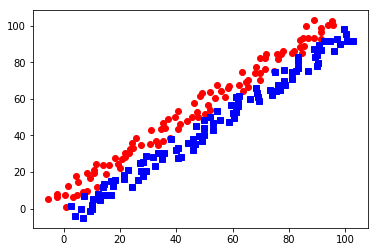

In [12]:
# Genero dos muestras de puntos y las ploteo.
rojo = genDatos(100, 0, 1, 10)
azul = genDatos(100, 0, 1, -10)
pyplot.plot(rojo[:,0], rojo[:,1], 'ro')
pyplot.plot(azul[:,0], azul[:,1], 'bs')
pyplot.show()

In [13]:
# Computo PCA sobre todos los puntos.
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
todos = np.concatenate((rojo, azul))
pca = PCA(n_components=2)
pca.fit(todos)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

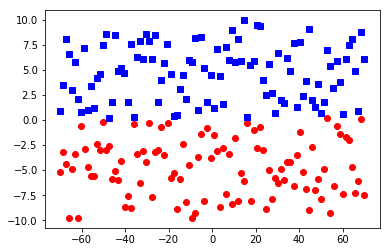

In [14]:
# Transformo las muestras originales al nuevo sistema de coordenadas,
# y las ploteo.
rojo_transf = pca.transform(rojo)
azul_transf = pca.transform(azul)
pyplot.plot(rojo_transf[:,0], rojo_transf[:,1], 'ro')
pyplot.plot(azul_transf[:,0], azul_transf[:,1], 'bs')
pyplot.show()

### Ejercicio 
Transformar con PCA los datos de los ejemplos A y B, conservar sólo las primeras $k$
Componentes (probar con distintos valores de $k$) y volver a evaluar los algoritmos de clasificación.